<a href="https://colab.research.google.com/github/Br-Julia/MVP-Sprint-3/blob/main/MVP_Preco_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PUC - RIO
#MVP - Mínimo Produto Viável

#Sprint Machine Learning & Analytics
Profs. Patrick e Hugo Villamizar

Aluna: Julia Bragança dos Santos Ferreira Lima

#1 Apresentação e Objetivo do notebook

#1.1 Objetivo do Notebook

O objetivo deste notebook foi realizar o treinamento de um modelo de Machine Learning para um modelo de regressão de um Dataset chamado "Laptop Prices Based on its specifications", este dataset foi retirado do portal KAGGLE, da seguinte fonte: https://www.kaggle.com/datasets/ara001/laptop-prices-based-on-its-specifications.

A finalidade será realizar o treinamento do modelo por meio de um aprendizado supervisionado com o intuito de estimar o preço de um notebook de acordo com suas características.

Serão realizadas as etapas de importações, estatísticas descritivas, preparação dos modelos, separação do modelo em dados de treinamento e teste, seleção de atributos, transformações nos dados, modelagem, otimização dos hiperparâmetros e avaliação dos resultados.

A principal hipótese é que o modelo tenha um aumento do desempenho em cada etapa, principalmente ao realizar a transformação dos dados por intermédio da normalização e padronização.

Para realizar a avaliação do modelo será utilizada a métrica de Erro quadrático médio e raiz do erro quadrático médio.

Ao fim, espera-se que seja possível perceber uma melhora de desempenho do modelo com a finalidade de colocar o modelo para utilizá-lo em produção.



##1.2 Apresentação do Notebook

Os atributos do Dataset são os seguintes:

* Marca: Marca do Notebook
* Tipo: Tipo do Notebook, se ele é um Netbook, Notebook, Ultrabook, Gaming ou Workstation
* Tam_tela: Tamanho da Tela (em polegadas)
* Config_Tela: Qual a configuração da tela, como HD, 4k, Touchscream, etc
* CPU: Se refere ao processador e suas configurações, se é da Intel, AMD, se é I3, I5, I7 e suas gerações
* Ram: Memória Ram(GB), variando entre 2 e 64Gb
* HD: Capacidade de armazenamento do HD, se tem somente 1HD, se é SSD, Flash Storage, com capacidades variadas, podendo ser em GB ou TB
* Gpu: Placa de vídeo (Nvidia, Intel, AMD e suas variações)
* OP_Sys: Sistema Operacional (Mac, Windows, Linux, Android e etc)
* Peso: Peso em Kgs
* Preço: Preço de venda do Notebook em Reais

#2 Importações

##2.1 Instalação do Pandas Profiling

In [233]:
#Instalação do Pandas Profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


##2.2 Importação das Bibliotecas

In [234]:
#Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

#Imports Necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline


##2.3 Importação do Dataset

In [235]:
#Definindo o nome das colunas do dataset
labels_atributos = ["Marca", "Tipo", "Tam_tela", "Config_Tela", "CPU", "Ram", "HD", "Gpu", "OP_Sys", "Peso", "Preço"]

#Importando o Dataset Principal
Dataset = pd.read_csv("https://raw.githubusercontent.com/Br-Julia/MVP-Sprint-3/main/laptop_data.csv", names=labels_atributos, header=1)

Dataset.head(5)

,Marca,Tipo,Tam_tela,Config_Tela,CPU,Ram,HD,Gpu,OP_Sys,Peso,Preço
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000


#3 Estatísticas Descritivas

In [236]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 1 to 1302
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Marca        1302 non-null   object 
 1   Tipo         1302 non-null   object 
 2   Tam_tela     1302 non-null   float64
 3   Config_Tela  1302 non-null   object 
 4   CPU          1302 non-null   object 
 5   Ram          1302 non-null   object 
 6   HD           1302 non-null   object 
 7   Gpu          1302 non-null   object 
 8   OP_Sys       1302 non-null   object 
 9   Peso         1302 non-null   object 
 10  Preço        1302 non-null   float64
dtypes: float64(2), object(9)
memory usage: 122.1+ KB


O Dataset possui 11 colunas e 1302 linhas, sendo 9 colunas do tipo object e 2 colunas do tipo float.

In [237]:
Dataset.describe()

,Tam_tela,Preço
count,1302.000000,1302.000000
mean,15.018510,59861.203709
std,1.426057,37256.145021
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79303.816800
max,18.400000,324954.720000


Por este comando é possível verificar a contagem de amostras, a média, o desvio padrão, valor máximo e mínimo das váriaveis numéricas.
A nossa variavel Target será o preço e é possível visualizar que o valor máximo é 324.954,72 e o mínimo é 9.720,72.

In [238]:
#Verificação dos valores missing no Dataset
Dataset.isnull().sum()

Marca          0
Tipo           0
Tam_tela       0
Config_Tela    0
CPU            0
Ram            0
HD             0
Gpu            0
OP_Sys         0
Peso           0
Preço          0
dtype: int64

Visualização do numero de valores nulos no Dataset, para verificar se será necessário realizar algum tratamento nos dados. Porém, como não há nenhum dado ausente, não serão realizadas tratativas nesse sentido.

#4 Ajustes do Dataset

Nesta etapa foram realizados os tratamentos necessários para a modelagem do Dataset em Machine Learning, isto inclui transformar os dados categóricos em numéricos.

##4.1 Transformação das colunas em numéricas

Foram verificadas que algumas colunas continham os dados numéricos mas com a unidade de medida, portanto neste momento, foram retiradas as unidades de medida e transformados os dados de object para float.

In [239]:
#Realizando a retirada do texto Kg da coluna de peso
Dataset['Peso'] = Dataset['Peso'].apply(lambda x: re.sub(r'kg', '', x))

#Transformando o dado de object para numérico
Dataset['Peso'] = Dataset['Peso'].str.replace('kgs', '').astype(float)

#Exibindo as 5 primeiras linhas do dataset
Dataset.head()

,Marca,Tipo,Tam_tela,Config_Tela,CPU,Ram,HD,Gpu,OP_Sys,Peso,Preço
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000


In [240]:
#Realizando a retirada da texto GB da coluna Ram
Dataset['Ram'] = Dataset['Ram'].apply(lambda x: re.sub(r'GB', '', x))

#Transformando o dado de object para numérico
Dataset['Ram'] = Dataset['Ram'].str.replace('GB', '').astype(int)

#Exibindo as 5 primeiras linhas do dataset
Dataset.head()

,Marca,Tipo,Tam_tela,Config_Tela,CPU,Ram,HD,Gpu,OP_Sys,Peso,Preço
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000


##4.2 Ordinal Encoder

Abaixo foram realizadas a transformação dos dados categóricos em dados numéricos utilizando o Ordinal Encoder tendo em vista que há uma ordem do melhor desempenho para o pior nos dados dos atributos abaixo e a não utilização desse tipo de encoder poderia dificultar o modelo a realizar as análises de forma eficaz.

In [241]:
#Colocando os valores da coluna HD em ordem do pior
Dataset_Encoded = pd.DataFrame(Dataset)
HD_ordem = ['8GB SSD',
            '16GB Flash Storage',
            '16GB SSD',
            '32GB HDD',
            '32GB Flash Storage',
            '32GB SSD',
            '64GB Flash Storage',
            '64GB SSD',
            '128GB HDD',
            '128GB Flash Storage',
            '128GB SSD',
            '180GB SSD',
            '256GB SSD +  256GB SSD',
            '256GB Flash Storage',
            '240GB SSD',
            '256GB SSD',
            '500GB HDD',
            '512GB Flash Storage',
            '508GB Hybrid',
            '512GB SSD',
            '128GB SSD +  1TB HDD',
            '1.0TB HDD',
            '1TB HDD',
            '256GB SSD +  1TB HDD',
            '2TB HDD',
            '256GB SSD +  2TB HDD',
            '512GB SSD +  256GB SSD',
            '64GB Flash Storage +  1TB HDD',
            '256GB SSD +  500GB HDD',
            '128GB SSD +  2TB HDD',
            '512GB SSD +  512GB SSD',
            '1TB HDD +  1TB HDD',
            '1.0TB Hybrid',
            '1TB SSD',
            '512GB SSD +  1TB HDD',
            '256GB SSD +  1.0TB Hybrid',
            '512GB SSD +  1.0TB Hybrid',
            '512GB SSD +  2TB HDD',
            '1TB SSD +  1TB HDD',
]

enc=OrdinalEncoder(categories = [HD_ordem])


Dataset_Encoded["HD"] = enc.fit_transform(Dataset_Encoded[["HD"]])

In [242]:
#Colocando os valores da coluna Config_Tela em ordem
Tela_ordem = ['IPS Panel Retina Display 2880x1800',
              'IPS Panel Retina Display 2560x1600',
              'IPS Panel Retina Display 2304x1440',
              'IPS Panel Full HD / Touchscreen 1920x1080',
              'IPS Panel Full HD 1920x1080',
              'Full HD / Touchscreen 1920x1080',
              'Touchscreen / Quad HD+ 3200x1800',
              'Quad HD+ / Touchscreen 3200x1800',
              'Quad HD+ 3200x1800',
              'IPS Panel Quad HD+ / Touchscreen 3200x1800',
              'Touchscreen / 4K Ultra HD 3840x2160',
              'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
              '4K Ultra HD 3840x2160',
              'IPS Panel Full HD 2160x1440',
              '4K Ultra HD / Touchscreen 3840x2160',
              'IPS Panel 4K Ultra HD 3840x2160',
              'IPS Panel Full HD 2560x1440',
              'IPS Panel Retina Display 2736x1824',
              'Touchscreen 2400x1600',
              '2560x1440',
              'IPS Panel Quad HD+ 2560x1440',
              'IPS Panel Quad HD+ 3200x1800',
              'IPS Panel Touchscreen 2560x1440',
              'IPS Panel 2560x1440',
              'IPS Panel Touchscreen / 4K Ultra HD 3840x2160',
              'Touchscreen 2256x1504',
              'Touchscreen 2560x1440',
              'IPS Panel Touchscreen 2400x1600',
              'Touchscreen / Full HD 1920x1080',
              'Full HD 1920x1080',
              'IPS Panel Full HD 1920x1200',
              'IPS Panel Full HD 1366x768',
              'IPS Panel Touchscreen 1920x1200',
              'IPS Panel 1366x768',
              'IPS Panel Touchscreen 1366x768',
              'Touchscreen 1366x768',
              '1920x1080',
              '1600x900',
              '1440x900',
              '1366x768'


]

enc=OrdinalEncoder(categories = [Tela_ordem])


Dataset_Encoded["Config_Tela"] = enc.fit_transform(Dataset_Encoded[["Config_Tela"]])

Alguns outros atributos possuiam uma importância ordinal nos seus dados, porém, devido a falta de conhecimento acerca do assunto e a dificuldade de colocá-los em ordem, foi decidido pela utilização do label encoder tendo em vista que uma classificação incorreta da ordem dos dados poderia piorar o desempenho do modelo.

In [243]:
# Aplicando o Dummy Encoding nas colunas Marca, Tipo e Op_Sys
Dataset_Encoded = pd.get_dummies(Dataset_Encoded, columns=["Marca", "Tipo", "OP_Sys"])

#Exibindo as 5 primeiras linhas do dataset
Dataset_Encoded.head()

,Tam_tela,Config_Tela,CPU,Ram,HD,Gpu,Peso,Preço,Marca_Acer,Marca_Apple,...,Tipo_Workstation,OP_Sys_Android,OP_Sys_Chrome OS,OP_Sys_Linux,OP_Sys_Mac OS X,OP_Sys_No OS,OP_Sys_Windows 10,OP_Sys_Windows 10 S,OP_Sys_Windows 7,OP_Sys_macOS
1,13.3,38.0,Intel Core i5 1.8GHz,8,9.0,Intel HD Graphics 6000,1.34,47895.5232,False,True,...,False,False,False,False,False,False,False,False,False,True
2,15.6,29.0,Intel Core i5 7200U 2.5GHz,8,15.0,Intel HD Graphics 620,1.86,30636.0000,False,False,...,False,False,False,False,False,True,False,False,False,False
3,15.4,0.0,Intel Core i7 2.7GHz,16,19.0,AMD Radeon Pro 455,1.83,135195.3360,False,True,...,False,False,False,False,False,False,False,False,False,True
4,13.3,1.0,Intel Core i5 3.1GHz,8,15.0,Intel Iris Plus Graphics 650,1.37,96095.8080,False,True,...,False,False,False,False,False,False,False,False,False,True
5,15.6,39.0,AMD A9-Series 9420 3GHz,4,16.0,AMD Radeon R5,2.10,21312.0000,True,False,...,False,False,False,False,False,False,True,False,False,False


##4.2 Label Encoder

Abaixo foi realizada a transformação dos dados categóricos em dados numericos por intermédio do label encoder. Alguns dados talvez pudessem ocasionar em um ganho de desempenho de modelo se fosse utilizado o método de One Hot Encoder ou Dummy Encoder, entretanto, optou-se por não realizar esses métodos devido ao aumento da dimensionalidade que causaria em função da grande quantidade de valores unicos nos atributos.

In [244]:
#Realizando o Label Encoder nas colunas CPU e Gpu,
label_encoder = preprocessing.LabelEncoder()

Dataset_Encoded["CPU"]= label_encoder.fit_transform(Dataset_Encoded["CPU"])

label_encoder = preprocessing.LabelEncoder()

Dataset_Encoded["Gpu"]= label_encoder.fit_transform(Dataset_Encoded["Gpu"])

#Exibindo as 5 primeiras linhas do dataset
Dataset_Encoded.head()

,Tam_tela,Config_Tela,CPU,Ram,HD,Gpu,Peso,Preço,Marca_Acer,Marca_Apple,...,Tipo_Workstation,OP_Sys_Android,OP_Sys_Chrome OS,OP_Sys_Linux,OP_Sys_Mac OS X,OP_Sys_No OS,OP_Sys_Windows 10,OP_Sys_Windows 10 S,OP_Sys_Windows 7,OP_Sys_macOS
1,13.3,38.0,63,8,9.0,51,1.34,47895.5232,False,True,...,False,False,False,False,False,False,False,False,False,True
2,15.6,29.0,74,8,15.0,53,1.86,30636.0000,False,False,...,False,False,False,False,False,True,False,False,False,False
3,15.4,0.0,85,16,19.0,9,1.83,135195.3360,False,True,...,False,False,False,False,False,False,False,False,False,True
4,13.3,1.0,67,8,15.0,59,1.37,96095.8080,False,True,...,False,False,False,False,False,False,False,False,False,True
5,15.6,39.0,14,4,16.0,17,2.10,21312.0000,True,False,...,False,False,False,False,False,False,True,False,False,False


Nesta etapa todos os atributos tiveram seus dados transformados em numéricos de forma que fosse possível seguir com o treinamento do modelo, a ser realizado na próxima etapa.

#5 Preparação dos Dados

##5.1 Ajuste da variável Target

Nesta etapa foi necessário realizar o drop da variavel preço que é o nosso target e reinserí-lo ao final do dataset para facilitar a divisão dos dados.

In [245]:
# Armazenando a coluna "Preço"
df_preco = Dataset_Encoded['Preço']

# Removendo a coluna "Preço" do DataFrame
Dataset_Encoded.drop(columns=['Preço'], inplace=True)

# Adicionando a coluna "Preço" de volta como a última coluna
Dataset_Encoded['Target'] = df_preco

##5.2 Separação do Modelo em bases de Treino e Teste

In [246]:
# Separação em bases de treino e teste (holdout)
array = Dataset_Encoded.values
X = array[:,0:41]
y = array[:,41]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=24) # faz a divisão

In [247]:
# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=24) # faz o particionamento em 10 folds

Neste passo, foi realizado um estudo utilizando a validação cruzada com 3,5, 7 e 10 folds e posteriormente fazendo a análise dos resultados, dos 4 testes executados, o que teve o melhor desempenho foi a divisão de 10 folds, portanto seguiremos com essa divisão nas próximas etapas.

##5.3 Modelagem inicial

A seguir foi realizada a modelagem inicial utilizando os algoritmos de ML: Regressão Linear com regressão de Lasso e Ridge, Kneighbors, árvore de decisão e Support Vector Machine, utilizando a validação cruzada realizada acima.

LR: MSE 405714281.89 (104920243.59) - RMSE 20142.35
Ridge: MSE 402994324.14 (103479639.50) - RMSE 20074.72
Lasso: MSE 405424005.24 (104723959.39) - RMSE 20135.14
KMN: MSE 433218400.08 (110543035.17) - RMSE 20813.90
Cart: MSE 405247164.40 (96699410.80) - RMSE 20130.75
SVM: MSE 1406002945.13 (358066232.95) - RMSE 37496.71


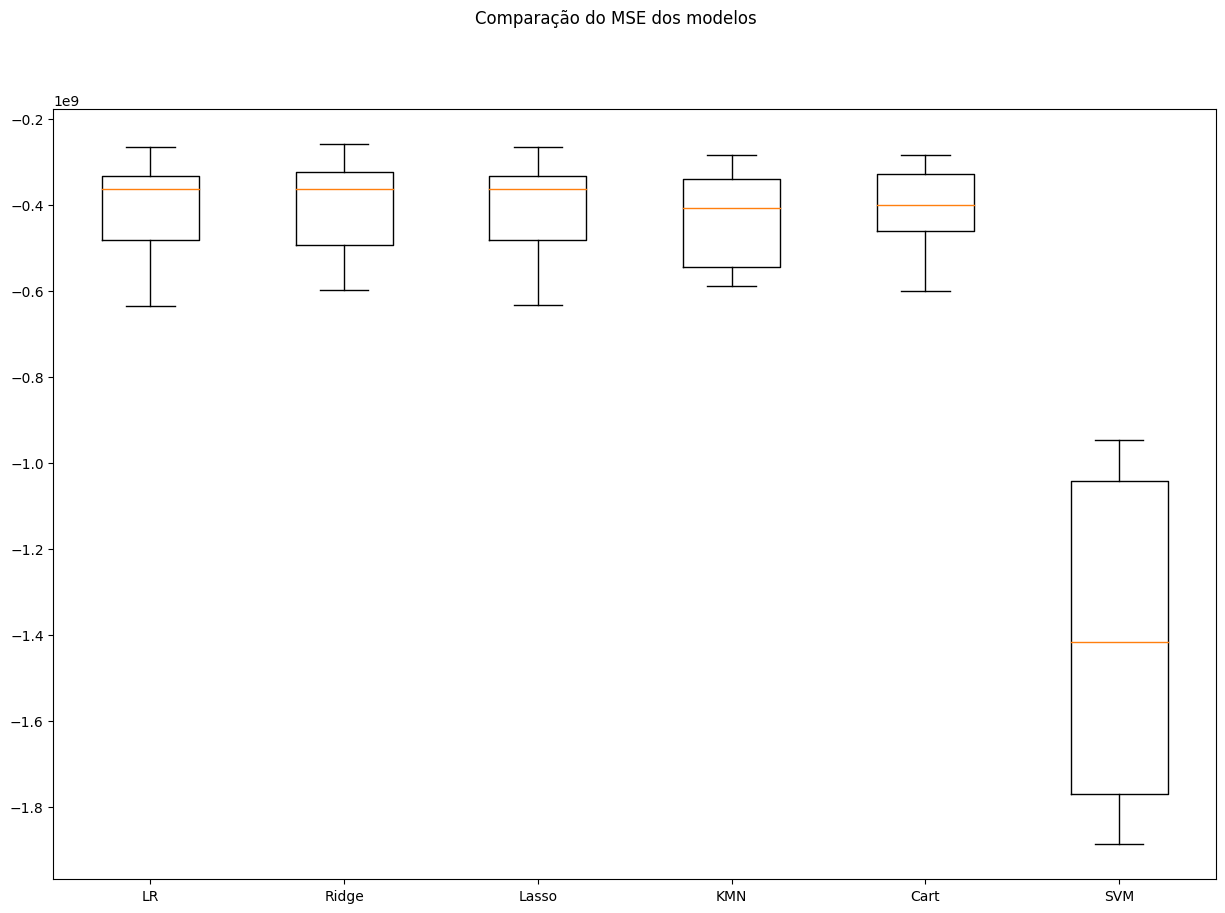

In [248]:
#Definindo uma seed global para esta célula de código
np.random.seed(24)

#Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

models.append(("LR", LinearRegression(fit_intercept=True)))
models.append(("Ridge", Ridge()))
models.append(("Lasso", Lasso()))
models.append(("KMN", KNeighborsRegressor()))
models.append(("Cart", DecisionTreeRegressor()))
models.append(("SVM", SVR ()))

#Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="neg_mean_squared_error")
  results.append(cv_results)
  names.append(name)

  #Imprime MSE, Desvio Padrão e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print (msg)

   # BoxPlot de comparação dos modelos
fig = plt.figure(figsize=(15, 10))
fig.suptitle("Comparação do MSE dos modelos")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Após a realização desta modelagem, foi possível verificar que o erro do modelo foi inferior no modelo de Regressão Linear com regularização de Ridge, o que indica um melhor desempenho neste.

Posteriormente serão realizadas etapas para melhorar o modelo com a utilização de Ensembles, Feature Selection e Transformação nos dados.
Este modelo será avaliado utilizando a base de teste:

#6 Pré-Processamento de dados

##6.1 Feature Selection

A seguir será realizada a seleção de recursos integrada com a Regressão Linear com regularização de Ridge para reduzir a dimensionalidade do dataset e tentar obter um melhor desempenho no modelo.

In [249]:
#inicializando e treinando o modelo de Ridge
ridge = RidgeCV(cv=10)
ridge.fit(X, y)

#Padronizando os dados
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

#Aplicando a Seleção dos recursos
selector = SelectFromModel(ridge)
X_train_selecionado_padronizado = selector.fit_transform(X_train_standardized, y_train)
X_test_selecionado_padronizado = selector.transform(X_test_standardized)  # Aplicar a mesma seleção aos dados de teste

#Obtendo os índices das features selecionadas nos dados padronizados
selected_feature_indices = selector.get_support(indices=True)

#Obtendo os nomes das features selecionadas
selected_feature_names = [Dataset_Encoded.columns[i] for i in selected_feature_indices]

print("Recursos selecionados:")
print(selected_feature_names)

#Aplicando a seleção de recursos aos dados originais
X_train_selecionado = X_train[:, selected_feature_indices]
X_test_selecionado = X_test[:, selected_feature_indices]

Recursos selecionados:
['Tam_tela', 'Config_Tela', 'CPU', 'Ram', 'Gpu', 'Peso', 'Marca_Acer', 'Marca_Razer', 'Tipo_Notebook', 'Tipo_Ultrabook', 'Tipo_Workstation', 'OP_Sys_No OS', 'OP_Sys_Windows 7']


Portanto, os atributos com maiores importâncias foram a 'Tam_tela', 'Config_Tela', 'CPU', 'Ram', 'Gpu', 'Peso', 'Marca_Acer', 'Marca_Razer', 'Tipo_Notebook', 'Tipo_Ultrabook', 'Tipo_Workstation', 'OP_Sys_No OS', 'OP_Sys_Windows 7'.

Para a realização do Feature Selection, foi necessário realizar a padronização e normalização dos dados antes de executar o código para evitar possíveis problemas que poderiam ocorrer. Entretanto, vamos seguir com o código sem a padronização com a finalidade de análisar como o modelo irá proceder com seus valores originais e somente depois realizar a normalização e padronização e comparar seus resultados.

Abaixo será realizado o treinamento do novo modelo com a finalidade de verificar se houve melhora no desempenho após a seleção de atributos.

LR: MSE 420252207.18 (110742110.32) - RMSE 20500.05
Ridge: MSE 417996552.51 (109609123.18) - RMSE 20444.96
Lasso: MSE 420238619.47 (110734071.63) - RMSE 20499.72
KMN: MSE 421131690.76 (107763751.11) - RMSE 20521.49
Cart: MSE 434307964.11 (163227011.54) - RMSE 20840.06
SVM: MSE 1405696877.44 (358034899.10) - RMSE 37492.62


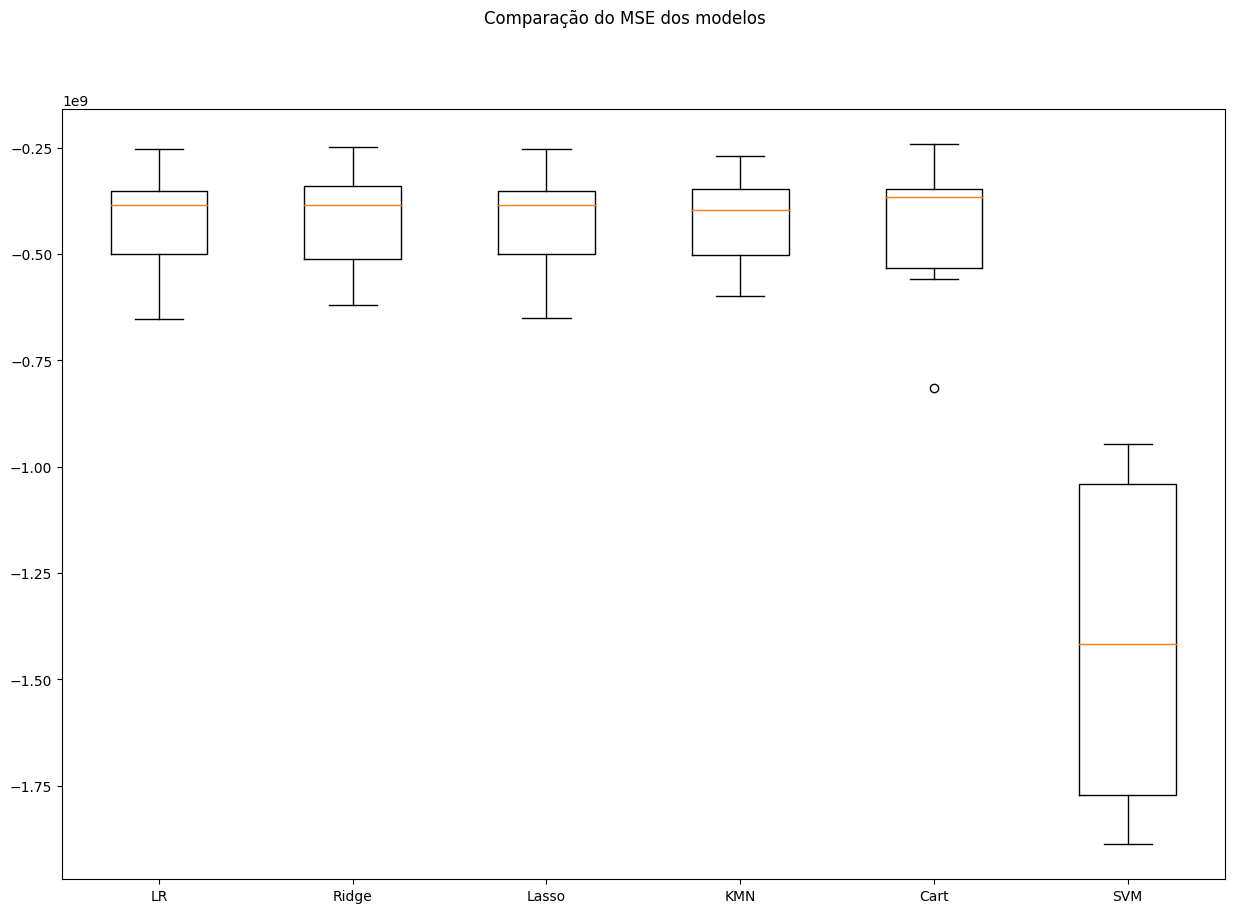

In [250]:
#Definindo uma seed global para esta célula de código
np.random.seed(24)

#Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

models.append(("LR", LinearRegression()))
models.append(("Ridge", Ridge()))
models.append(("Lasso", Lasso()))
models.append(("KMN", KNeighborsRegressor()))
models.append(("Cart", DecisionTreeRegressor()))
models.append(("SVM", SVR ()))

#Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train_selecionado, y_train, cv=kfold, scoring="neg_mean_squared_error")
  results.append(cv_results)
  names.append(name)
    #Imprime MSE, Desvio Padrão e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print (msg)

# BoxPlot de comparação dos modelos
fig = plt.figure(figsize=(15, 10))
fig.suptitle("Comparação do MSE dos modelos")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


Após o treinamento, foi possível observar uma piora no desempenho, porém os valores de MSE e RMSE foram próximos em relação ao treinamento sem a Feature Selection, e o modelo que teve o melhor desempenho se manteve a Regressão Linear com Regularização de Ridge.

##6.2 Modelagem utilizando os Ensembles

A seguir será realizada uma etapa de modelagem e inferência utilizando a configuração padrão dos hiperparâmetros e os métodos Ensembles. Neste momento, iremos realizar o treinamento com os atributos obtidos no Feature Selection para verificar o desempenho do modelo e posteriormente iremos realizar outro treinamento sem o FS para realizar a comparação entre os dois.


LR: MSE 420252207.18 (110742110.32) - RMSE 20500.05
Ridge: MSE 417996552.51 (109609123.18) - RMSE 20444.96
Lasso: MSE 420238619.47 (110734071.63) - RMSE 20499.72
KMN: MSE 421131690.76 (107763751.11) - RMSE 20521.49
Cart: MSE 434307964.11 (163227011.54) - RMSE 20840.06
SVM: MSE 1405696877.44 (358034899.10) - RMSE 37492.62
Bagging: MSE 243993770.38 (76751636.92) - RMSE 15620.30
RF: MSE 230081547.34 (84739593.02) - RMSE 15168.44
ET: MSE 236028626.38 (83334543.29) - RMSE 15363.22
Ada: MSE 531033145.54 (139832802.71) - RMSE 23044.16
GB: MSE 224842845.80 (57520594.88) - RMSE 14994.76
Votting: MSE 416047508.47 (106044074.08) - RMSE 20397.24


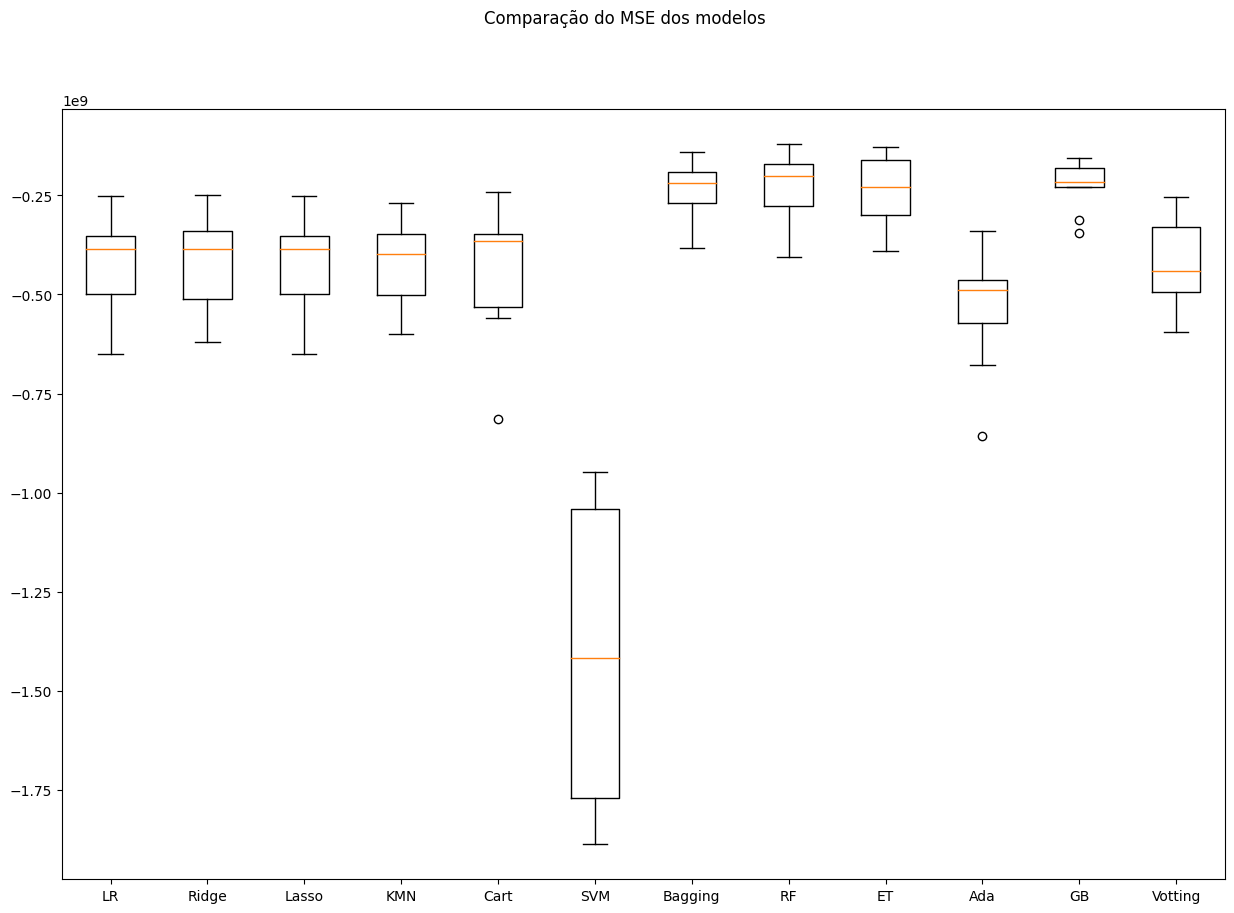

In [251]:
#Definindo uma seed global para esta célula de código
np.random.seed(24)

#Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

models.append(("LR", LinearRegression(fit_intercept=True)))
models.append(("Ridge", Ridge()))
models.append(("Lasso", Lasso()))
models.append(("KMN", KNeighborsRegressor()))
models.append(("Cart", DecisionTreeRegressor()))
models.append(("SVM", SVR ()))

#Definindo os parametros do classificador base para o BaggingRegressor
base = DecisionTreeRegressor()
num_trees = 100
max_features = 5

#Criando os modelos para o VottingRegressor
bases = []
model1 = LinearRegression(fit_intercept=True)
bases.append(("Linear", model1))
model2 = DecisionTreeRegressor()
bases.append(("Cart", model2))
model3 = SVR()
bases.append(("svr", model3))

#Criando os ensembles e adicionando-os na lista de modelos
models.append(("Bagging", BaggingRegressor(base_estimator=base, n_estimators=num_trees)))
models.append(("RF", RandomForestRegressor(n_estimators=num_trees, max_features=max_features)))
models.append(("ET", ExtraTreesRegressor(n_estimators=num_trees, max_features=max_features)))
models.append(("Ada", AdaBoostRegressor(n_estimators=num_trees)))
models.append(("GB", GradientBoostingRegressor(n_estimators=num_trees)))
models.append(("Votting", VotingRegressor(bases)))

#Lista para armazenar os resultados
results = []
names = []

#Avaliação dos modelos
for name, model in models:
  cv_results = cross_val_score(model, X_train_selecionado, y_train, cv=kfold, scoring="neg_mean_squared_error")
  results.append(cv_results)
  names.append(name)
#Imprime MSE, Desvio Padrão e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print (msg)

#BoxPlot de comparação dos modelos
fig = plt.figure(figsize=(15, 10))
fig.suptitle("Comparação do MSE dos modelos")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



Nesta etapa, foi realizado o treinamento do modelo com a configuração padrão de hiperparâmetros e foi possível obter um ganho no desempenho comparado aos treinamentos anteriores com a utilização dos Ensembles os três melhores modelos foram o Gradient Boosting, Extra Trees Regressor e Random Forest que obtiveram o melhor desempenho dos modelos testados.

##6.3 Pipelines e Transformação nos dados

A seguir, iremos repetir o processo utilizando a biblioteca Pipeline para criar e avaliar os modelos através da validação cruzada com os dados originais, normalizados e padronizados, somente com os melhores modelos obtidos na etapa anterior. (RF, ET e GB)

RF-orig: MSE 233532613.82 (86763473.21) - RMSE 15281.77
ET-orig: MSE 230709622.55 (85225340.87) - RMSE 15189.13
GB-orig: MSE 223368293.16 (54023553.60) - RMSE 14945.51
RF-padr: MSE 241160839.02 (87755448.51) - RMSE 15529.35
ET-padr: MSE 240628233.49 (90650342.31) - RMSE 15512.20
GB-padr: MSE 226214484.78 (59833971.25) - RMSE 15040.43
RF-norm: MSE 230506499.17 (81093935.80) - RMSE 15182.44
ET-norm: MSE 234244060.49 (85911485.00) - RMSE 15305.03
GB-norm: MSE 223567291.66 (54472143.28) - RMSE 14952.17


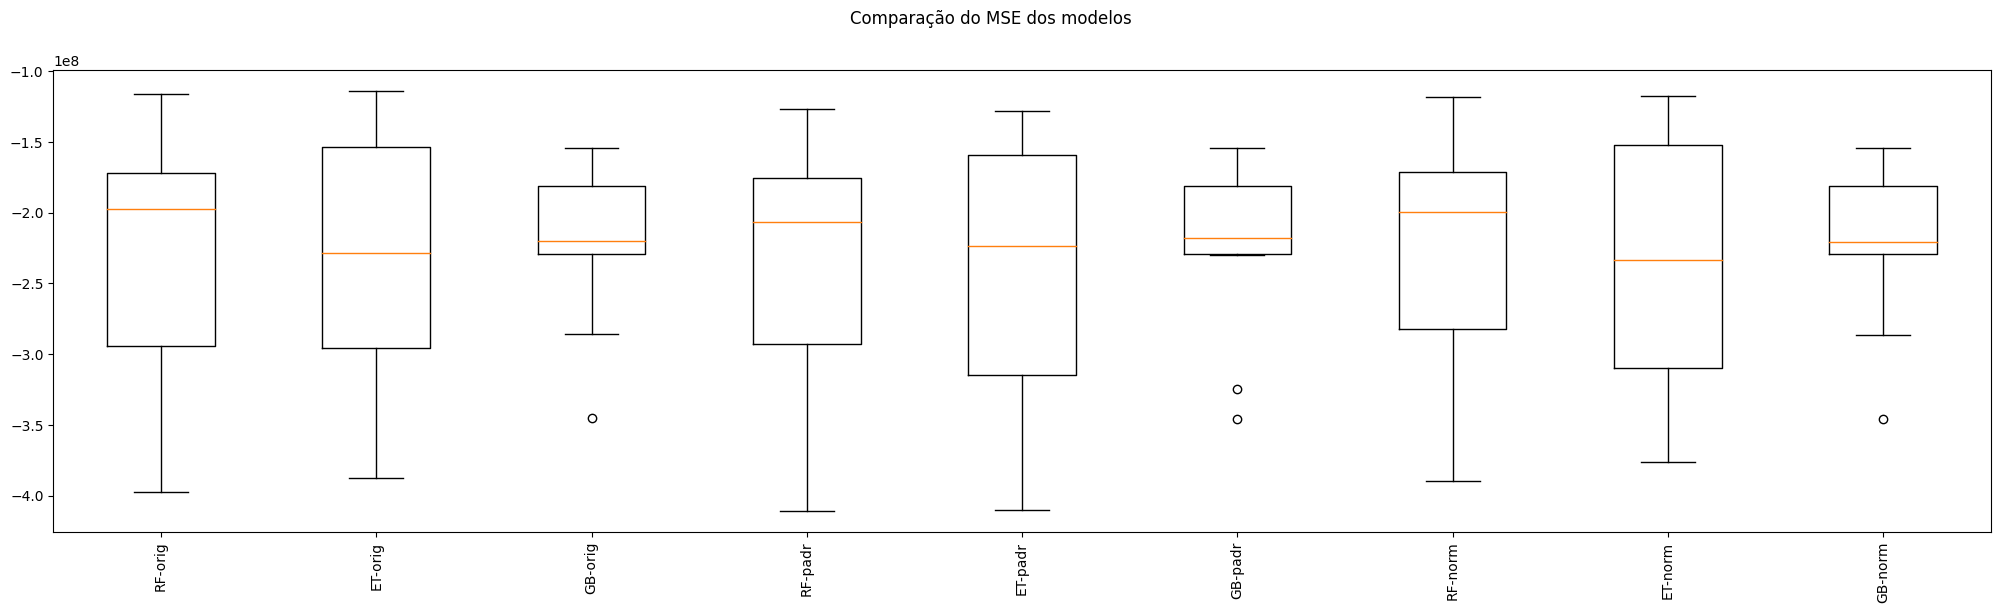

In [252]:
#Definindo uma seed global para esta célula de código
np.random.seed(24)

#Listas para armazenar os modelos, os resultados e os nomes dos modelos
pipelines = []
results = []
names = []

random_forest = ("RF", RandomForestRegressor(n_estimators=num_trees, max_features=max_features))
extra_trees = ("ET", ExtraTreesRegressor(n_estimators=num_trees, max_features=max_features))
g_boosting = ("GB", GradientBoostingRegressor(n_estimators=num_trees))

#Transformações utilizadas
standard_scaler = ("StantdardScaler", StandardScaler())
min_max_scaler = ("MinMaxScaler", MinMaxScaler())

#dataset original

pipelines.append(("RF-orig", Pipeline([random_forest])))
pipelines.append(("ET-orig", Pipeline([extra_trees])))
pipelines.append(("GB-orig", Pipeline([g_boosting])))

#dataset padronizado

pipelines.append(("RF-padr", Pipeline([standard_scaler, random_forest])))
pipelines.append(("ET-padr", Pipeline([standard_scaler, extra_trees])))
pipelines.append(("GB-padr", Pipeline([standard_scaler, g_boosting])))

#dataset normalizado
pipelines.append(("RF-norm", Pipeline([min_max_scaler, random_forest])))
pipelines.append(("ET-norm", Pipeline([min_max_scaler, extra_trees])))
pipelines.append(("GB-norm", Pipeline([min_max_scaler, g_boosting])))

#Avaliação dos modelos
for name, model in pipelines:
  cv_results = cross_val_score(model, X_train_selecionado, y_train, cv=kfold, scoring="neg_mean_squared_error")
  results.append(cv_results)
  names.append(name)
    #Imprime MSE, Desvio Padrão e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print (msg)

# BoxPlot de comparação dos modelos
fig = plt.figure(figsize=(25, 6))
fig.suptitle("Comparação do MSE dos modelos")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()


A partir dos valores obtidos e dos gráficos, foi possível verificar que o Gradient Boosting com os dados originais, portanto, a seguir será realizado um estudo com a finalidade de verificar se utilizando o Grid Search conseguiremos resultados superiores, ainda mantendo os três Ensembles acima.

##6.4 Grid Search

###6.4.1 Random Forest

In [253]:
#Definindo os parâmetros do GridSearch
param_grid = {
    'RF__n_estimators': [225, 275, 300],
    'RF__max_depth': [30, 40, 50],
    'RF__max_features': [1, 2, 3],
}

#preparando o pipeline
random_forest = RandomForestRegressor()
random_forest_pipeline = Pipeline([('scaler', MinMaxScaler()), ('RF', random_forest)])

#Prepara e executa o GridSearch
grid_search = GridSearchCV(estimator=random_forest_pipeline, param_grid=param_grid, cv=kfold, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train_selecionado, y_train)

#Imprimindo os Melhores parâmetros e melhor modelo
print("Melhores parâmetros:", grid_search.best_params_)

best_model = grid_search.best_estimator_
print("Melhor modelo:", best_model)

# Calcula o MSE e RMSE do melhor modelo
best_model_mse = -grid_search.best_score_
best_model_rmse = np.sqrt(best_model_mse)

print("MSE do melhor modelo:", best_model_mse)
print("RMSE do melhor modelo:", best_model_rmse)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
Melhores parâmetros: {'RF__max_depth': 40, 'RF__max_features': 1, 'RF__n_estimators': 275}
Melhor modelo: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('RF',
                 RandomForestRegressor(max_depth=40, max_features=1,
                                       n_estimators=275))])
MSE do melhor modelo: 221347488.3656481
RMSE do melhor modelo: 14877.751455298885


### 6.4.2 Extra Tree Regressor

In [254]:
#Definindo os parâmetros do GridSearch
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [30, 40, 50],
    'max_features': [1, 2, 3],
   }

#Inicializando o modelo
extra_trees = ExtraTreesRegressor(random_state=24)

#Preparando e executando o GridSearch
grid_search = GridSearchCV(estimator=extra_trees, param_grid=param_grid, cv=kfold, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train_selecionado, y_train)

#Imprimindo os Melhores parâmetros e melhor modelo
print("Melhores parâmetros:", grid_search.best_params_)
best_model = grid_search.best_estimator_
print("Melhor modelo:", best_model)

# Calcula e imprime o MSE e RMSE do melhor modelo
best_model_mse = -grid_search.best_score_
best_model_rmse = np.sqrt(best_model_mse)

print("MSE do melhor modelo:", best_model_mse)
print("RMSE do melhor modelo:", best_model_rmse)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
Melhores parâmetros: {'max_depth': 40, 'max_features': 1, 'n_estimators': 200}
Melhor modelo: ExtraTreesRegressor(max_depth=40, max_features=1, n_estimators=200,
                    random_state=24)
MSE do melhor modelo: 223674303.5176757
RMSE do melhor modelo: 14955.744833263092


### 6.4.3 Gradient Boosting

In [255]:
#Definindo os parâmetros do GridSearch
param_grid = {
    'n_estimators': [75, 100, 125],
    'learning_rate': [0.02, 0.1, 0.25],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

#Inicializando o modelo
gb_model = GradientBoostingRegressor()

#Preparando e executando o GridSearch
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=kfold, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_selecionado, y_train)

#Exibindo o melhor modelo e os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search.best_params_)
best_model = grid_search.best_estimator_
print("Melhor modelo:", best_model)

#Calculando e imprimindo o MSE e RMSE do melhor modelo
best_model_mse = -grid_search.best_score_
best_model_rmse = np.sqrt(best_model_mse)

print("MSE do melhor modelo:", best_model_mse)
print("RMSE do melhor modelo:", best_model_rmse)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Melhores parâmetros: {'learning_rate': 0.25, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 125}
Melhor modelo: GradientBoostingRegressor(learning_rate=0.25, n_estimators=125)
MSE do melhor modelo: 209684182.48051557
RMSE do melhor modelo: 14480.475906561758


Após esse treinamento, foi possível verificar que todos os algoritmos melhoraram seu desempenho após o Grid Search, que foi realizado diversas combinações até chegar as melhores combinações que podem ser vistas acima. O modelo que teve melhor desempenho após o GridSearch foi o Gradient Boosting.

##6.5 Modelagem com a divisão inicial do Dataset sem o FS

Abaixo será realizado o treinamento do modelo utilizando os algoritimos iniciais de regressão linear para facilitar a comparação, junto aos Ensembles utilizando o Dataset original sem a utilização do Feature Selection, ou seja, com todos os atributos originais.

LR: MSE 405714281.89 (104920243.59) - RMSE 20142.35
Ridge: MSE 402994324.14 (103479639.50) - RMSE 20074.72
Lasso: MSE 405424005.24 (104723959.39) - RMSE 20135.14
KMN: MSE 433218400.08 (110543035.17) - RMSE 20813.90
Cart: MSE 405247164.40 (96699410.80) - RMSE 20130.75
SVM: MSE 1406002945.13 (358066232.95) - RMSE 37496.71
Bagging: MSE 237905069.39 (73224619.06) - RMSE 15424.17
RF: MSE 215729683.89 (85034784.06) - RMSE 14687.74
ET: MSE 201634071.09 (78988690.45) - RMSE 14199.79
Ada: MSE 552089547.84 (108214091.80) - RMSE 23496.59
GB: MSE 221992733.47 (54244911.06) - RMSE 14899.42
Votting: MSE 430096385.48 (131326010.47) - RMSE 20738.77


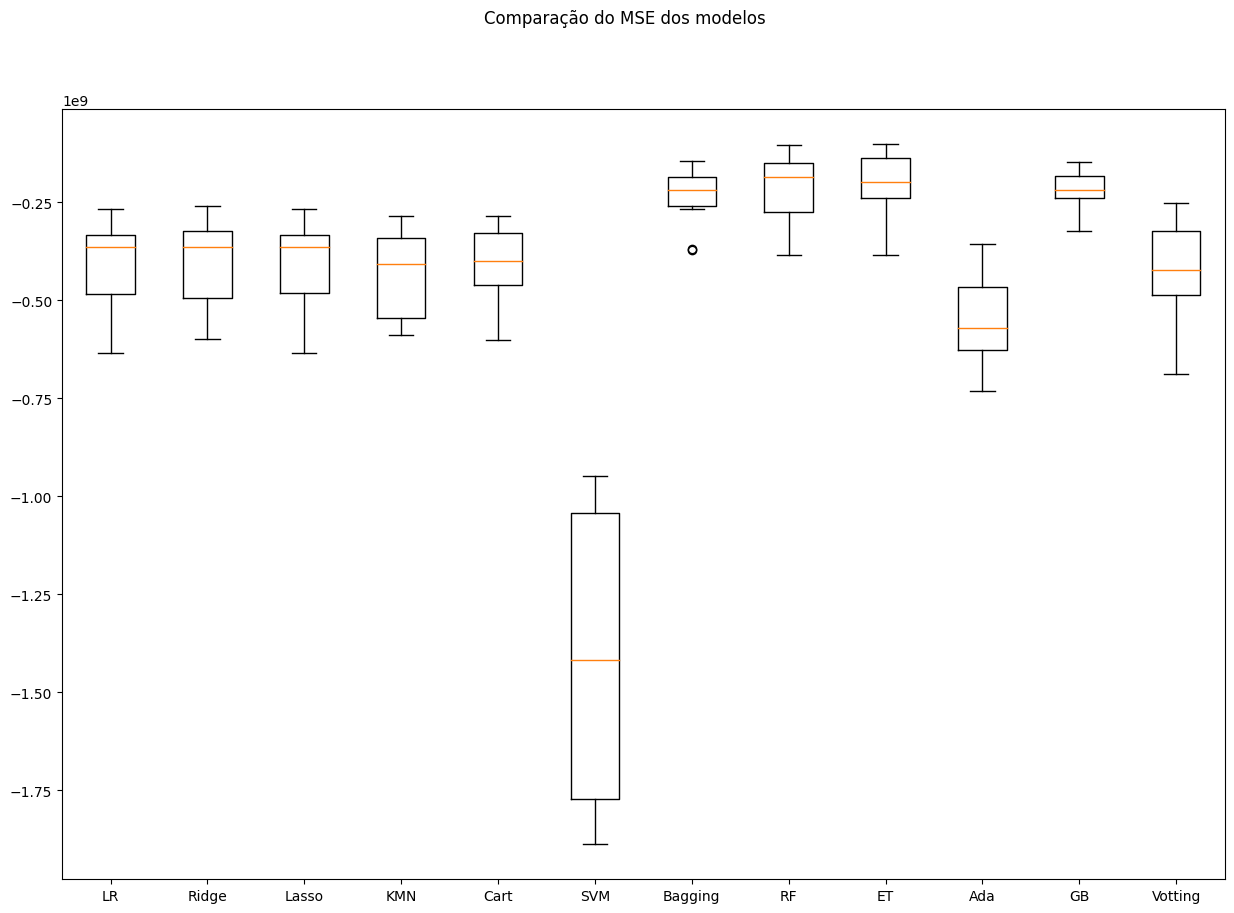

In [256]:
#Definindo uma seed global para esta célula de código
np.random.seed(24)

#Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

models.append(("LR", LinearRegression(fit_intercept=True)))
models.append(("Ridge", Ridge()))
models.append(("Lasso", Lasso()))
models.append(("KMN", KNeighborsRegressor()))
models.append(("Cart", DecisionTreeRegressor()))
models.append(("SVM", SVR ()))

#Definindo os parametros do classificador base para o BaggingRegressor
base = DecisionTreeRegressor()
num_trees = 100
max_features = 5

#Criando os modelos para o VottingRegressor
bases = []
model1 = LinearRegression(fit_intercept=True)
bases.append(("Linear", model1))
model2 = DecisionTreeRegressor()
bases.append(("Cart", model2))
model3 = SVR()
bases.append(("svr", model3))

#Criando os ensembles e adicionando-os na lista de modelos
models.append(("Bagging", BaggingRegressor(base_estimator=base, n_estimators=num_trees)))
models.append(("RF", RandomForestRegressor(n_estimators=num_trees, max_features=max_features)))
models.append(("ET", ExtraTreesRegressor(n_estimators=num_trees, max_features=max_features)))
models.append(("Ada", AdaBoostRegressor(n_estimators=num_trees)))
models.append(("GB", GradientBoostingRegressor(n_estimators=num_trees)))
models.append(("Votting", VotingRegressor(bases)))

#Lista para armazenar os resultados
results = []
names = []

#Avaliação dos modelos
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="neg_mean_squared_error")
  results.append(cv_results)
  names.append(name)
    #Imprime MSE, Desvio Padrão e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print (msg)

# BoxPlot de comparação dos modelos
fig = plt.figure(figsize=(15, 10))
fig.suptitle("Comparação do MSE dos modelos")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


Houve um aumento de desempenho utilizando os Ensembles e o algoritimo com o melhor desempenho tendo sido o Extra Trees Regressor, seguido do Random Forest e do Gradient Boosting.

Uma nova modelagem será executada com a utilização dos Ensembles com melhor desempenho, utilizando os dados originais, dados normalizados e padronizados além da utilização do Pipeline.

RF-orig: MSE 217845515.86 (84885963.71) - RMSE 14759.59
ET-orig: MSE 202328393.65 (74962903.26) - RMSE 14224.22
GB-orig: MSE 218852117.66 (48771892.63) - RMSE 14793.65
RF-padr: MSE 217207137.08 (85066931.17) - RMSE 14737.95
ET-padr: MSE 204039608.73 (77844417.24) - RMSE 14284.24
GB-padr: MSE 217061455.73 (49414231.55) - RMSE 14733.01
RF-norm: MSE 217532105.89 (84470445.41) - RMSE 14748.97
ET-norm: MSE 207073735.09 (76225463.76) - RMSE 14390.06
GB-norm: MSE 221425652.88 (56864709.74) - RMSE 14880.38


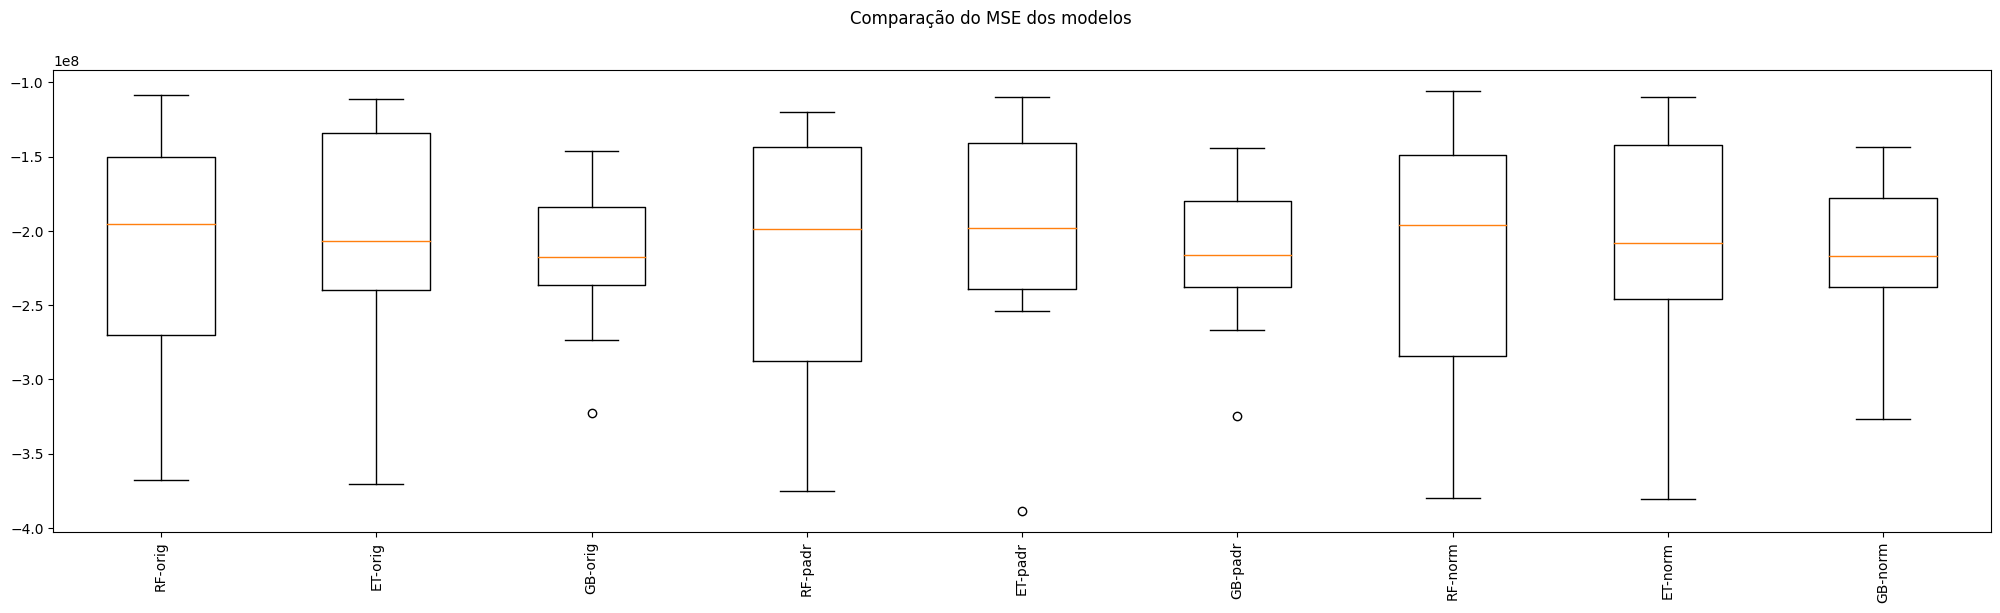

In [257]:
#Definindo uma seed global para esta célula de código
np.random.seed(24)

#Listas para armazenar os modelos, os resultados e os nomes dos modelos
pipelines = []
results = []
names = []

random_forest = ("RF", RandomForestRegressor(n_estimators=num_trees, max_features=max_features))
extra_trees = ("ET", ExtraTreesRegressor(n_estimators=num_trees, max_features=max_features))
g_boosting = ("GB", GradientBoostingRegressor(n_estimators=num_trees))

#Transformações utilizadas
standard_scaler = ("StantdardScaler", StandardScaler())
min_max_scaler = ("MinMaxScaler", MinMaxScaler())

#dataset original
pipelines.append(("RF-orig", Pipeline([random_forest])))
pipelines.append(("ET-orig", Pipeline([extra_trees])))
pipelines.append(("GB-orig", Pipeline([g_boosting])))

#dataset padronizado
pipelines.append(("RF-padr", Pipeline([standard_scaler, random_forest])))
pipelines.append(("ET-padr", Pipeline([standard_scaler, extra_trees])))
pipelines.append(("GB-padr", Pipeline([standard_scaler, g_boosting])))

#dataset normalizado
pipelines.append(("RF-norm", Pipeline([min_max_scaler, random_forest])))
pipelines.append(("ET-norm", Pipeline([min_max_scaler, extra_trees])))
pipelines.append(("GB-norm", Pipeline([min_max_scaler, g_boosting])))

#Avaliação dos modelos
for name, model in pipelines:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="neg_mean_squared_error")
  results.append(cv_results)
  names.append(name)
    #Imprime MSE, Desvio Padrão e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print (msg)

# BoxPlot de comparação dos modelos
fig = plt.figure(figsize=(25, 6))
fig.suptitle("Comparação do MSE dos modelos")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Acima é possível verificar uma melhora consideravel no desempenho dos modelos sem o Feature Selection, com o Ensemble Extra Trees Regressor sendo o mais eficaz utilizando o dataset original sem normalização ou padronização. Entretanto, os modelos de Random Forest e Gradient Boosting foram superiores com os dados padronizados.

### 6.6 Grid Search nos dados do Dataset sem o FS

###6.6.1 Random Forest

In [258]:
#Definindo os parâmetros do GridSearch
param_grid = {
    'RF__n_estimators': [225, 275, 300],
    'RF__max_depth': [30, 40, 50],
    'RF__max_features': [1, 2, 3],
}

#Iniciando o modelo
random_forest = RandomForestRegressor()
random_forest_pipeline = Pipeline([('scaler', StandardScaler()), ('RF', random_forest)])

#Preparando e executando o GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_pipeline, param_grid=param_grid, cv=kfold, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

#Exibindo e imprimindo o melhor modelo e os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search.best_params_)
best_model = grid_search.best_estimator_
print("Melhor modelo:", best_model)

#Calculando o MSE e RMSE do melhor modelo
best_model_mse = -grid_search.best_score_
best_model_rmse = np.sqrt(best_model_mse)

print("MSE do melhor modelo:", best_model_mse)
print("RMSE do melhor modelo:", best_model_rmse)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
Melhores parâmetros: {'RF__max_depth': 30, 'RF__max_features': 3, 'RF__n_estimators': 275}
Melhor modelo: Pipeline(steps=[('scaler', StandardScaler()),
                ('RF',
                 RandomForestRegressor(max_depth=30, max_features=3,
                                       n_estimators=275))])
MSE do melhor modelo: 210869551.1406626
RMSE do melhor modelo: 14521.348117191552


###6.6.2 Extra Trees Regressor

In [259]:
#Definindo os parâmetros do GridSearch
param_grid = {
    'n_estimators': [25, 50, 100],
    'max_depth': [30, 50, 100],
    'max_features': [3, 5, 10],
   }

#Inicializando o modelo
extra_trees = ExtraTreesRegressor(random_state=24)

#Preparando e executando o GridSearchCV
grid_search = GridSearchCV(estimator=extra_trees, param_grid=param_grid, cv=kfold, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

#Exibindo e imprimindo o melhor modelo e os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search.best_params_)
best_model = grid_search.best_estimator_
print("Melhor modelo:", best_model)

# Calcula o MSE e RMSE do melhor modelo
best_model_mse = -grid_search.best_score_
best_model_rmse = np.sqrt(best_model_mse)

print("MSE do melhor modelo:", best_model_mse)
print("RMSE do melhor modelo:", best_model_rmse)


Fitting 10 folds for each of 27 candidates, totalling 270 fits
Melhores parâmetros: {'max_depth': 30, 'max_features': 5, 'n_estimators': 100}
Melhor modelo: ExtraTreesRegressor(max_depth=30, max_features=5, random_state=24)
MSE do melhor modelo: 198894289.42561495
RMSE do melhor modelo: 14102.988669981089


### 6.6.3 Gradient Boosting

In [260]:
#Definindo os parâmetros do GridSearch
param_grid = {
    'gb_model__n_estimators': [75, 100, 125],
    'gb_model__learning_rate': [0.02, 0.1, 0.25],
    'gb_model__max_depth': [3, 5, 7],
    'gb_model__min_samples_split': [2, 5, 10],
    'gb_model__min_samples_leaf': [1, 2, 3]
}

#Criando o modelo
gb_model = GradientBoostingRegressor()

#preparando a padronização
scaler = StandardScaler()

#Preparando o Pipeline
pipeline = Pipeline([('scaler', scaler), ('gb_model', gb_model)])

#Preparando e executando o GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=kfold, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

#Exibindo o melhor nodelo e os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search.best_params_)
best_model = grid_search.best_estimator_
print("Melhor modelo:", best_model)

# Calcula o MSE e RMSE do melhor modelo
best_model_mse = -grid_search.best_score_
best_model_rmse = np.sqrt(best_model_mse)

print("MSE do melhor modelo:", best_model_mse)
print("RMSE do melhor modelo:", best_model_rmse)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Melhores parâmetros: {'gb_model__learning_rate': 0.25, 'gb_model__max_depth': 3, 'gb_model__min_samples_leaf': 1, 'gb_model__min_samples_split': 5, 'gb_model__n_estimators': 125}
Melhor modelo: Pipeline(steps=[('scaler', StandardScaler()),
                ('gb_model',
                 GradientBoostingRegressor(learning_rate=0.25,
                                           min_samples_split=5,
                                           n_estimators=125))])
MSE do melhor modelo: 187148969.52899733
RMSE do melhor modelo: 13680.240112256704


Após a realização do GridSearch dos algoritimos mais eficazes, obtivemos uma melhora consideravel no desempenho do modelo e embora o Extra Trees Regressor tenha tido um desempenho melhor na etapa anterior, com o GridSearch com os dados padronizados, o Gradient Boosting acabou se mostrando mais eficaz e portanto será o algoritimo escolhido para a produção do modelo.

##6.7 Treinamento do modelo com todo o Dataset

###6.7.1 Avaliação do modelo com o conjunto de teste

Abaixo será realizado o treinamento do modelo com todo o conjunto de dados para avaliação do modelo, cabe ressaltar, que o feature selection não foi muito eficaz para o modelo, portanto iremos realizar o teste com o conjunto de dados do dataset original e portanto nao foi necessário aplicar a Feature selection nos dados de teste.

In [261]:
#Preparando a Padronização
scaler = StandardScaler()

#Padronizando os conjuntos de treino e teste
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Avaliando o modelo com o conjunto de treinamento padronizado
model = GradientBoostingRegressor(max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=125, learning_rate=0.25)
model.fit(X_train_scaled, y_train)

#Realizando as previsões no conjunto de teste padronizado
predictions = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))

MSE: 135832928.3571118
RMSE: 11654.738450823845


Obtivemos um aumento no desempenho ao realizar o treinamento com todo o dataset e o modelo encontra-se pronto para colocar em produção.

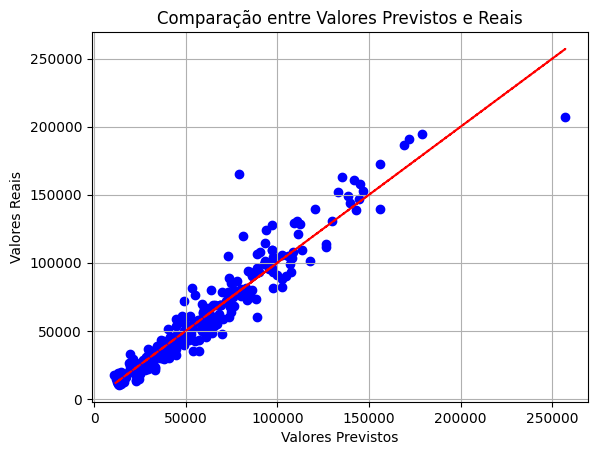

In [262]:
#Preparando o gráfico de dispersão
plt.scatter(predictions, y_test, color='blue')
plt.plot(predictions, predictions, color='red', linestyle='--')  # Linha de referência para comparação
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Comparação entre Valores Previstos e Reais')

#Exibindo o gráfico
plt.grid(True)
plt.show()

Por fim, observamos um resultado superior se comparado com o modelo de treinamento, porém, com resultados próximos, o que indica que não há um overfitting ou underfitting.

Pelo gráfico dispersão, podemos observar que os valores previstos estão próximos aos valores reais, principalmente quando os valores previstos vão até o valor da média do notebook, o aumento gradativo dos valores reais a partir deste valor ocasiona em um aumento na dispersão. Isso pode estar ocorrendo pelo numero inferior de amostras com valores muito acima da média.

Com um Dataset mais robusto e com amostras mais balanceadas poderiamos ter um melhor desempenho com os valores superiores dos dados.

###6.7.2 Avaliação do modelo com o conjunto de teste utilizando o R-Quadrado

In [263]:
#Calculando o coeficiente de determinação (R²) para avaliar o desempenho do modelo
R2 = r2_score(y_test,predictions)
print(R2)

0.9116574257679334


Com esse método, foi possível avaliar a porcentagem da variança que pôde ser prevista pelo modelo de regressão, chegando a 91,16%.

###6.7.3 Avaliação do modelo com o conjunto de teste utilizando o R-Quadrado ajustado

In [264]:
#Calculando o coeficiente de determinação ajustado (R² ajustado)
def adjusted_r2(y_test, y_pred,X_train):

  from sklearn.metrics import r2_score

  adj_r2 = (1 - ((1 - r2_score(y_test, y_pred)) * (len(y_test) - 1)) /
          (len(y_test) - X_train.shape[1] - 1))

  return adj_r2

adjusted_r2(y_test,predictions,X_train)

0.8951184050212908

Com esse método, foi possível avaliar a porcentagem da variança que pode ser contemplada pelo modelo de regressão, sem o viés que o método acima continha e portanto foi calculado em 89,51%.

A partir do conjunto de teste, foi obtida um erro ainda menor com os dados não vistos, porém próximo aos dados de treinamento. O que demonstra que o modelo não teve Overfitting e nem underfitting.

Por fim, será realizado um treinamento com todo o Dataset para preparar o modelo para utilização em produção.

In [265]:
model = GradientBoostingRegressor(max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=125, learning_rate=0.25)

#Preparando a Padronização
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
model.fit(X_scaled, y)

GradientBoostingRegressor(learning_rate=0.25, n_estimators=125)

#7 Conclusão


Após realizar a finalização dos treinamentos do Modelo de Regressão, foi possível observar que os algoritimos utilizando os Ensembles tiveram um desempenho superior, principalmente após a realização do Grid Search, entretanto, verificou-se que a melhora no desempenho depois de tentar diversas combinações no Grid Search acabou não sendo relevante além de ocasionar em um aumento de tempo relevante no treinamento do modelo.

Foi possível verificar que alguns algoritimos de Ensembles não tiveram uma melhora desempenho após a realização da normalização e da padronização, o que indica que esses algoritimos não são muito afetados pela escala dos dados.

O Feature Selection impactou em uma melhora de desempenho dos modelos treinados inicialmente, porém, acabou não sendo superior comparado ao treinamento com o Dataset original, portanto, optou-se por não utilizar a Feature Selection para o modelo final.

Através do Gráfico de dispersão foi possível observar que o modelo tem um desempenho superior com as amostras com valores inferiores ou mais próximos da média, conforme os valores das amostras foram aumentando, houve uma maior dispersão, isto ocorreu pelas amostras não estarem balanceadas.

Por fim, é possível concluir que o melhor algoritimo foi o Gradient Boosting Regresso e que não houve overfitting ou underfitting.

Como sugestão de melhoria neste trabalho, vislumbro, posteriormente, poder realizar o treinamento com outros modelos e realizar novos tratamentos nos dados, realizar outros tipos de feature selection, além de realizar alguns ajustes de hiperparâmetros em outros algoritimos e por fim, buscar novas amostras de modo a balancear melhor o Dataset e buscar novos dados para realizar o teste com dados não vistos e verificar como o modelo irá responder a estes dados.